In [ ]:
# Program description :- This is the sentiment analysis program that parses the tweets fetched from Twitter using Python and TF-IDF Model.

In [ ]:
# Import all the necessary libraries

In [ ]:
#importing nltk libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from math import log, sqrt
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from wordcloud import STOPWORDS
plt.style.use('fivethirtyeight')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Get the data from file
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_tweet.csv', encoding='latin-1')

In [ ]:
# Get first five rows from dataframe
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# check the size of the dataset
print("Shape of the DEPRESSION dataset is :- ",train.shape)

Shape of the DEPRESSION dataset is :-  (31962, 3)


# `Dataset Pre-processing`

In [ ]:
# Drop the uneccessary columns in dataset
train = train.drop(['id'], axis = 1)
train.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
# Change the column names to Tweets and Target
train.columns = ['Target', 'Tweets']

# Check the dataframe
train.head()

,Target,Tweets
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


# `Dataset Cleaning`

In [ ]:
# Clean @, http, and all the unnecessary words.

# Create a Function to Clean the Tweets
def cleanTweets(tweet):

  # Removed the @ mentioned
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet);

  # Removed the links
  tweet = re.sub(r'https?:\/\/\S', '', tweet);

  # Removed the #
  tweet = re.sub(r'#', '', tweet);

  # Removed the Re tweets
  tweet = re.sub(r'RT[\s]+', '', tweet);

  return tweet

# Cleaning the tweets
train['Tweets'] = train['Tweets'].apply(cleanTweets)

# Check the o/p
train.head()

,Target,Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can't use cause the...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide: society now motivation


In [ ]:
# Check for the target values
print("Unique values in the target are :- ",train['Target'].unique())

# Check for Number of 0's and 4's
print("\nNumber of Zero's and Four's are :-\n",train['Target'].value_counts())

# Check for the missing values in the dataset
print("\nMissing values in the dataset are :- ",train['Target'].isnull().sum())

Unique values in the target are :-  [0 1]

Number of Zero's and Four's are :-
 0    29720
1     2242
Name: Target, dtype: int64

Missing values in the dataset are :-  0


In [ ]:
# Check for Number of 0's and 4's
print("\nNumber of Zero's and Four's are :-\n",train['Target'].value_counts())


Number of Zero's and Four's are :-
 0    29720
1     2242
Name: Target, dtype: int64


# `Splitting the Data in Training and Testing Sets`

In [ ]:
# Check for train data
train['Target'].value_counts()

0    29720
1     2242
Name: Target, dtype: int64

In [ ]:
# Check for test data
# testData['Target'].value_counts()

In [ ]:
# Check for the train dataframe
train.head()

,Target,Tweets
0,0,when a father is dysfunctional and is so sel...
1,0,thanks for lyft credit i can't use cause the...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide: society now motivation


In [ ]:
# Check for the test dataframe
# testData.head()

## `Wordcloud Analysis`

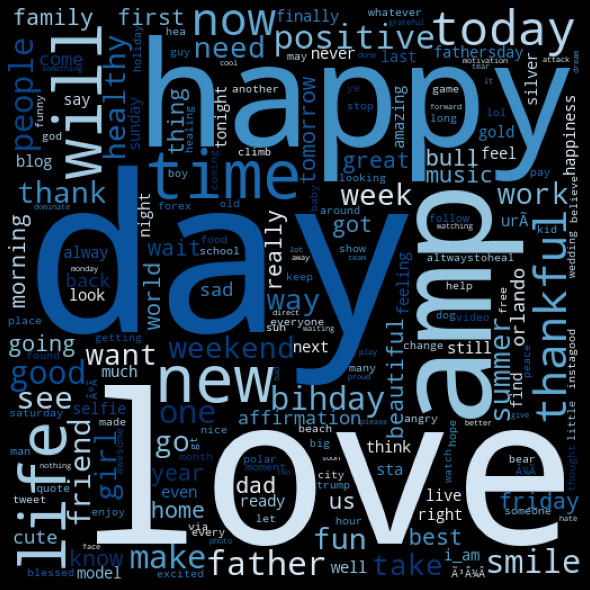

In [ ]:
# Plot word cloud for Positive words
Positive_words = ' '.join(list(train[train['Target'] == 0]['Tweets']))

# Get the wordCloud
Word_Cloud_Positive_Words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Positive_words)

# Plot the Word Cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Word_Cloud_Positive_Words)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

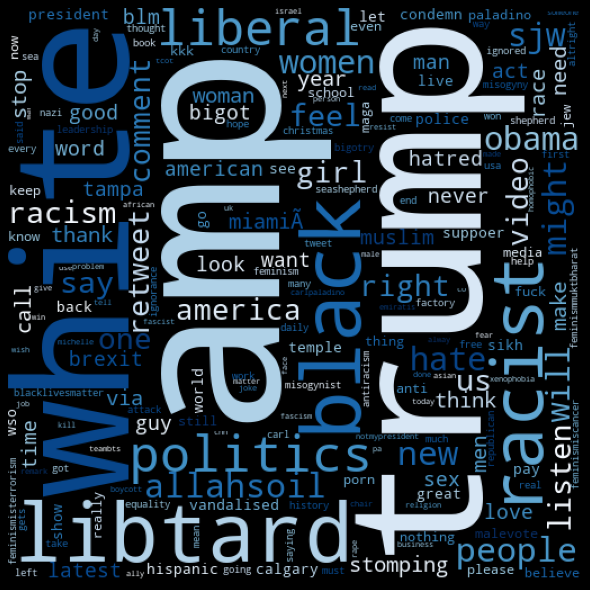

In [ ]:
# Plot word cloud for Negative words
Negative_words = ' '.join(list(train[train['Target'] == 1]['Tweets']))

# Get the wordCloud
Word_Cloud_Negative_Words = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Negative_words)

# Plot the Word Cloud
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Word_Cloud_Negative_Words)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
def process_tweet(message, lower_case = True, stem = True, stop_words = True, gram = 2):
  # Replacing all other information like '. ,'  with space
  review_message = re.sub('[^a-zA-Z]',' ', message)      
    
  # Lowering the sentances
  review_message = review_message.lower()
    
  # Spliting the sentance to get the words
  review_message_words = word_tokenize(review_message)

  # Attaching two words together for clearification
  if gram > 1:
        words = []
        for i in range(len(review_message_words) - gram + 1):
            words += [' '.join(review_message_words[i:i + gram])]
        return words

  # If word count less than 2 then remove it
  review_message_words = [word for word in review_message_words if len(word) > 2]
    
  #list comprehension (stemming)
  review_message_words = [stemmer.stem(word) for word in review_message_words if word not in set(stopwords.words('english'))]
    
  return review_message_words

In [ ]:
# Get the data from file
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_tweets.csv', encoding='latin-1')

In [ ]:
# Get first five rows from dataframe
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# check the size of the dataset
print("Shape of the DEPRESSION dataset is :- ",test.shape)

Shape of the DEPRESSION dataset is :-  (17197, 2)


In [ ]:
# Drop the uneccessary columns in dataset
test = test.drop(['id'], axis = 1)
test.head()

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# Change the column names to Tweets and Target
test.columns = ['Tweets']

In [ ]:
# Get first five rows from dataframe
test.head()

,Tweets
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...
2,safe ways to heal your #acne!! #altwaystohe...
3,is the hp and the cursed child book up for res...
4,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
# Clean @, http, and all the unnecessary words.

# Create a Function to Clean the Tweets
def cleanTweets(tweet):

  # Removed the @ mentioned
  tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet);

  # Removed the links
  tweet = re.sub(r'https?:\/\/\S', '', tweet);

  # Removed the #
  tweet = re.sub(r'#', '', tweet);

  # Removed the Re tweets
  tweet = re.sub(r'RT[\s]+', '', tweet);

  return tweet

# Cleaning the tweets
test['Tweets'] = test['Tweets'].apply(cleanTweets)

# Check the o/p
test.head()

,Tweets
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the ...
2,safe ways to heal your acne!! altwaystoheal...
3,is the hp and the cursed child book up for res...
4,"3rd bihday to my amazing, hilarious nephew e..."


In [ ]:
test.shape

(17197, 1)

In [ ]:
# Check for the test dataframe
test.head()

,Tweets
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the ...
2,safe ways to heal your acne!! altwaystoheal...
3,is the hp and the cursed child book up for res...
4,"3rd bihday to my amazing, hilarious nephew e..."


In [ ]:
class TweetClassifier(object):
  def __init__(self, trainData):
    self.tweets, self.target = trainData['Tweets'], trainData['Target']

  # Create a function to train our data
  def train_IFIDF_Model(self):

    # First calculate the frequencies of words
    self.calculate_IF_and_IDF()

    # Do the logarithmic part of it.
    self.calculate_TFIDF()

  # Create a function to calculate the frequencies of word per sentance
  def calculate_IF_and_IDF(self):

    # Get total no. of tweets from the tweets
    no_of_tweets = self.tweets.shape[0]

    # Store the count of depressive and positive tweets
    self.depressive_tweets = self.target.value_counts()[1]
    self.positive_tweets = self.target.value_counts()[0] 

    # Get the total tweets
    self.total_tweets = self.depressive_tweets + self.positive_tweets

    # Lets keep count of all depressive and positive words
    self.depressive_words = 0
    self.positive_words = 0

    # Create a hash hable for each word in the table to keep its track
    self.tf_depressive = dict()
    self.tf_positive = dict()

    # Create a hash table to store all the words in one list.
    self.idf_depressive = dict()
    self.idf_positive = dict()

    # Term frequency = 
      # No. of repetation of words in sentance
      # ----------------------------------------
      #         No. of words in sentance

    # Inverse Term Frequency = 
      #             No of sentances
      # ---------------------------------------
      #    No. of sentances containing Words

    # Iterate over each tweet
    for tweet_index in range(no_of_tweets):

      # Process the tweet before doing TF-IDF
      tweet_processed = process_tweet(self.tweets.iloc[tweet_index])

      # To keep track of whether the word has ocured in the message or not.
      # That is for IDF calculations
      list_of_words = list()

      # Lets make Term Frequency and Inverse Term Frequency count of words
      for word in tweet_processed:

        # If sentance is positive then target is zero
        if self.target.iloc[tweet_index] == 0:

          # Add that word to dictionary of positive words
          self.tf_positive[word] = self.tf_positive.get(word,0) + 1

          # Increase the count of positive word by 1
          self.positive_words += 1

        # If sentance is negative then target is one
        else:

          # Add that word to dictionary of negative words
          self.tf_depressive[word] = self.tf_depressive.get(word,0) + 1

          # Increase the count of negative word by 1
          self.depressive_words += 1

        # No of sentances containing this words
        if word not in list_of_words:

          # Add that word
          list_of_words += [word]          

      # Get the count of number of sentances containing that perticular word
      for word in list_of_words:
        if self.target.iloc[tweet_index] == 1:
          self.idf_depressive[word] = self.idf_depressive.get(word, 0) + 1
        else:
          self.idf_positive[word] = self.idf_positive.get(word, 0) + 1
    
  # Create a function to calculate the TF-IDF score
  def calculate_TFIDF(self):

    # Create a dictionary to store the probability of each word
    self.probability_depressive_words = dict()
    self.probability_positive_words = dict()

    # Create sum of tf-idf
    self.sum_tf_idf_depressive_words = 0
    self.sum_tf_idf_positive_words = 0

    # Lets calculate the probability for depressive words
    for word in self.tf_depressive:

      # Calculate the probability
      self.probability_depressive_words[word] = (self.tf_depressive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive[word] + self.idf_positive.get(word, 0)))
      
      # calculate the sum to increase the accuracy
      self.sum_tf_idf_depressive_words += self.probability_depressive_words[word]

    for word in self.tf_depressive:
            self.probability_depressive_words[word] = (self.probability_depressive_words[word] + 1) / (self.sum_tf_idf_depressive_words + len(list(self.probability_depressive_words.keys())))

    # Lets calculate the probability for positive words
    for word in self.tf_positive:

      # Calculate the probability
      self.probability_positive_words[word] = (self.tf_positive[word]) * log((self.depressive_tweets + self.positive_tweets) \
                                                          / (self.idf_depressive.get(word, 0) + self.idf_positive[word]))
      
      # calculate the sum to increase the accuracy
      self.sum_tf_idf_positive_words += self.probability_positive_words[word]
    
    for word in self.tf_positive:
            self.probability_positive_words[word] = (self.probability_positive_words[word] + 1) / (self.sum_tf_idf_positive_words + len(list(self.probability_positive_words.keys())))

    # calculate the final TF-IDF value        
    self.probability_depressive_tweet, self.probability_positive_tweet = self.depressive_tweets / self.total_tweets, self.positive_tweets / self.total_tweets

  # Predictions now.
  def classify(self, processed_tweet):

    # create two variables to get the probability of positive and negative words in the input sentance
    probability_depressive = 0
    probability_positive = 0
    
    # Iterate over each word in the processed tweet
    for word in processed_tweet:

      # check for word probability in probability_depressive
      if word in self.probability_depressive_words:
        probability_depressive += log(self.probability_depressive_words[word])
        probability_depressive -= log(self.sum_tf_idf_depressive_words + len(list(self.probability_depressive_words.keys())))

      # check for word probability in probability_positive
      if word in self.probability_positive_words:
        probability_positive += log(self.probability_positive_words[word])       
        probability_positive -= log(self.sum_tf_idf_positive_words + len(list(self.probability_positive_words.keys())))

      # Add the probability_depressive_tweets and probability_positive_tweet        
      probability_depressive += log(self.probability_depressive_tweet)
      probability_positive += log(self.probability_positive_tweet)
    
    # return result
    return probability_depressive >= probability_positive   

  # Let's test our data
  def predict(self, testData):

    # craete a dictionary of result
    result = dict()

    # iterate over testData
    for (i, tweet) in enumerate(testData):

      # let's clean the tweet
      processed_tweet = process_tweet(tweet)

      # Get the result from our model
      result[i] = int(self.classify(processed_tweet))
      
    # return result
    return result

In [ ]:
def metrics(labels, predictions):
    true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0
    for i in range(len(labels)):
        true_pos += int(labels.iloc[i] == 1 and predictions[i] == 1)
        true_neg += int(labels.iloc[i] == 0 and predictions[i] == 0)
        false_pos += int(labels.iloc[i] == 0 and predictions[i] == 1)
        false_neg += int(labels.iloc[i] == 1 and predictions[i] == 0)
    precision = true_pos / (true_pos + false_pos)
    recall = true_pos / (true_pos + false_neg)
    Fscore = 2 * precision * recall / (precision + recall)
    accuracy = (true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)

    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F-score: ", Fscore)
    print("Accuracy: ", accuracy)

In [ ]:
sc_tf_idf = TweetClassifier(train)
sc_tf_idf.train_IFIDF_Model()
preds_tf_idf = sc_tf_idf.predict(test['Tweets'])
test['Target'] = preds_tf_idf.values()

In [ ]:
test.head(10)

,Tweets,Target
0,studiolife aislife requires passion dedication...,0
1,white supremacists want everyone to see the ...,1
2,safe ways to heal your acne!! altwaystoheal...,1
3,is the hp and the cursed child book up for res...,1
4,"3rd bihday to my amazing, hilarious nephew e...",1
5,choose to be :) momtips,1
6,something inside me dies Ã°ÂÂÂ¦Ã°ÂÂÂ¿Ã¢ÂÂ...,1
7,finishedtattooinkedinkloveitÃ¢ÂÂ¤Ã¯Â¸Â Ã¢ÂÂ...,0
8,i will never understand why my dad left me...,1
9,delicious food lovelife capetown mannaepicur...,1


In [ ]:
pm = process_tweet('Lately I have been feeling unsure of myself as a person & an artist')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_tweet('Extreme sadness, lack of energy, hopelessness')
sc_tf_idf.classify(pm)

False

In [ ]:

pm = process_tweet('okay lets see how to tackle mental illness problem!')
sc_tf_idf.classify(pm)

True

In [ ]:

pm = process_tweet('I am officially done with kanyewest')
sc_tf_idf.classify(pm)

True

In [ ]:

pm = process_tweet('My depression will not let me work out')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_tweet('Loving how me and my lovely partner is talking about what we want.')
sc_tf_idf.classify(pm)

True

In [ ]:

pm = process_tweet('Very rewarding when a patient hugs you and tells you they feel great after changing the diet and daily habits')
sc_tf_idf.classify(pm)

True

In [ ]:
pm = process_tweet('It’s the little things that make me smile. Got our new car today and this arrived with it')
sc_tf_idf.classify(pm)

True

In [ ]:
  pm = 'Happy Thursday everyone. Thought today was Wednesday so super happy tomorrow is Friday yayyyyy'
  gram = 2
  # Attaching two words together for clearification
  if gram > 1:
        words = []
        for i in range(len(pm) - gram + 1):
            words += [' '.join(pm[i:i + gram])]
        print(words)

In [ ]:
Tweet = "Extreme sadness, lack of energy, hopelessness"
print(TextBlob(Tweet).sentiment.polarity)

-0.125


In [ ]:
Tweet = "sadness is worst part of my life."
print(TextBlob(Tweet).sentiment.polarity)

-1.0


# `Only for Experiment Purpose`

In [ ]:
# Subjectivity :- Determines wheather the tweet is related to personal or with emotions or related to factual information.
# Subjectivity Range is [0,1]
# If subjectivity is higher then the tweet mostly refers to it is related to public opinion otherwise it is factual information.

# Create a Function to get the Subjectivity
def getSubjectivity(Tweet):
  return TextBlob(Tweet).sentiment.subjectivity

In [ ]:
# Polarity :- Determines wheather the statement is Negative or Neutral or Positive.
# Polarity range from [-1,1]
# For Positive statement :- Polarity > 0 && Polarity <= 1.
# For Negative statement :- Polarity < 0 && Polarity >= -1.
# For Neutral statement :- Polarity == 0.

# Create a Function to get the Subjectivity
def getPolarity(Tweet):
  return TextBlob(Tweet).sentiment.polarity

In [ ]:
# Create two new columns in the dataframe
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Check the dataframe
df.head()

In [ ]:
# Create a Function to compute the NEGATIVE, POSITIVE and NEUTRAL statements.
def getAnalysis(score):
  if score == 0:
    return 'Neutral'
  elif score<0:
    return 'Negative'
  else:
    return 'Positive'

# get the analysis of each tweet
df['Analysis of Tweets'] = df['Polarity'].apply(getAnalysis)

# Check the changes
df.head()



In [ ]:
# Plot word cloud for Positive words
PositiveWords = ' '.join([df['Tweets'][row] for row in range(0,df.shape[0]) if df['Analysis of Tweets'][row] == 'Positive'])

# Get the wordCloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 1, stopwords = STOPWORDS).generate(PositiveWords)

# Plot the Word Cloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Plot word cloud for Negative words
NegativeWords = ' '.join([df['Tweets'][row] for row in range(0,df.shape[0]) if df['Analysis of Tweets'][row] == 'Negative'])

# Get the wordCloud
wordCloud = WordCloud(width = 500, height = 300, random_state = 1, stopwords = STOPWORDS).generate(NegativeWords)

# Plot the Word Cloud
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Plot the Polarity vs Subjectivity for the first 500 points.
plt.figure(figsize=(8,6))
for row in range(0, 500):
  plt.scatter(df['Polarity'][row], df['Subjectivity'][row], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the total tweets from dataset
totalTweets = 8000 + 2314

# Make two new list for train and test indices
trainIndex, testIndex = list(), list()

# Spliting the data into 99-2 ratio
for i in range(df.shape[0]):
    if np.random.uniform(0, 1) < 0.98:
        trainIndex += [i]
    else:
        testIndex += [i]

# Spliting the dataset
trainData = df.iloc[trainIndex]
testData = df.iloc[testIndex]